In [ ]:
from notebooks import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The potoo.default_magic_magic extension is already loaded. To reload it, use:
  %reload_ext potoo.default_magic_magic


In [ ]:
# Default figsize for spectros
figsize(aspect=1/8);

In [ ]:
# Load model
#   - Chosen via notebooks/20180629_eval.ipynb (local runs) -> Train/test scores
search = Search.load_v0(
    'eval-na-dan170/split_i=0,train=2693,test=674,classes=170', 'n_species=170,n_recs=1.0',
    'cls=logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',  # Not std
    # 'cls=std-sgdlog,alpha=0.1,class_weight=balanced',  # std [TODO Re-run locally to get an n_species=170]
)
display(
    search,
    search.classifier_,
    len(search.classifier_.classes_),
)

Search(
  n_species=170,
  n_recs=1.0,
  classifier='cls: logreg_ovr,solver: liblinear,C: 0.1,class_weight: balanced',
  random_state=0,
  projection=Projection(
    features=Features(
      load=Load(channels=1, sample_rate=22050, sample_width_bit=16, cache_audio=True),
      sample_rate=22050,
      f_min=1000,
      f_bins=40,
      hop_length=256,
      frame_length=512,
      frame_window='hann',
      patch_length=4
    ),
    skm_fit_max_t=600000,
    k=500,
    variance_explained=0.99,
    do_pca=True,
    pca_whiten=True,
    standardize=False,
    normalize=False,
    agg_funs=['mean', 'std', 'max']
  )
)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

170

In [ ]:
# HACK FIXME Why doesn't search.projection.skm_ exist after unpickle?
projection = Projection.load('peterson-v0-26bae1c', features=Features(load=Load()))
features = projection.features
load = features.load
search.projection = projection
# These both work...
joblib_loads(joblib_dumps(projection)).skm_
joblib_loads(joblib_dumps(search)).projection.skm_

[21:03:01.768] DEBUG  Projection.load
  path: /Users/danb/hack/bubo/features/data/models/projection/peterson-v0-26bae1c.pkl


In [ ]:
user_recs = load_app_recs(projection,
    # n=10,
)
display(
    df_summary(user_recs).T,
    df_value_counts(user_recs),
    user_recs[:10],
)

[21:03:01.894] DEBUG  Load.audio:in
  len(recs): 164
  len(recs) per dataset: {recordings: 164}
[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[                                                                                          ] | 0% Completed |  0.2s

[##########################################                                                ] | 47% Completed |  0.3s

[##########################################################################################] | 100% Completed |  0.4s

[21:03:02.340] DEBUG  Load.audio:out
  len(audio): 164


[21:03:03.582] WARN   Dropped 1 recs with duplicate audio_id


recorded_at     dataset species species_com_name species_query  duration_s  samples_mb  samples_n                                          basename      species_longhand                                 audio_sha                                                           id                                                             path                                                                                                                          audio                                                                                                                                                                                                     feat
audio_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
20171007-c6f4 2017-10-07 15:18:04  recordings    BEWR    Bewick's Wren          BEWR      30.334       1.276     668860  BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2  Bewick's Wren - BEWR  c6f4dae698ffb4a89fc86f16534acc42cd22ffa9  recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2  recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2.wav  box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2: 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)  [0.04982862872651104, -0.009262523022536485, -0.05601014071033051, -0.033796207114706045, 0.019455693498256637, 0.09370623318547609, 0.028124866154280122, -0.01782948926585037, 0.08780507033291175...
20171007-c6f4 2017-10-07 15:18:04  recordings    BEWR    Bewick's Wren          BEWR      30.334       1.276     668860    BEWR Bewicks Wren 2 (Coyote Hills parking lot)  Bewick's Wren - BEWR  c6f4dae698ffb4a89fc86f16534acc42cd22ffa9    recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot)    recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot).wav    box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot): 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)  [0.04982862872651104, -0.009262523022536485, -0.05601014071033051, -0.033796207114706045, 0.019455693498256637, 0.09370623318547609, 0.028124866154280122, -0.01782948926585037, 0.08780507033291175...

[21:03:03.629] DEBUG  Features.spectros:in
  len(recs): 163
  len(recs) per dataset: {recordings: 163}
  sum(duration_h): 3.29
  sum(samples_mb): 498.0
  sum(samples_n): 261204420
[                                                                                          ] | 0% Completed |  0.0s

[################                                                                          ] | 18% Completed |  0.1s

[###########################################                                               ] | 48% Completed |  0.2s

[####################################################################                      ] | 75% Completed |  0.3s

[##########################################################################################] | 100% Completed |  0.4s

[21:03:04.077] DEBUG  Features.spectros:out
  (f, sum(t)): [40, 1020094]


min                                       25%                                                                               50%                                       75%                                                                max
                 dtype          sizeof    len count nunique mean std                                                                                                                                                                                                                                                                                   
audio_id         object         11410     163 163   163.0   NaN  NaN                             20160709-1e8c                             20160910-3543                                                                     20171007-a787                             20180513-1a88                                                      20180805-60c3
recorded_at      datetime64[ns] 1304      163 163   163.0   NaN  NaN                       2016-07-09 18:38:51                       2016-09-10 21:27:02                                                               2017-10-07 15:18:55                       2018-05-13 17:35:14                                                2018-08-05 15:57:16
dataset          object         10921     163 163   1.0     NaN  NaN                                recordings                                recordings                                                                        recordings                                recordings                                                         recordings
species          object         9943      163 163   35.0    NaN  NaN                                      AMBI                                      RTHA                                                                              _UNK                                      _UNK                                                               _UNK
species_com_name object         10933     163 163   35.0    NaN  NaN                          American Bittern                           Red-tailed Hawk                                                                           Unknown                                   Unknown                                                   Wilson's Warbler
species_query    object         9943      163 163   35.0    NaN  NaN                                      AMBI                                      RTHA                                                                              _UNK                                      _UNK                                                               _UNK
duration_s       float64        1304      163 163   158.0   NaN  NaN                                      2.75                                      19.1                                                                              48.8                                      90.8                                                                691
samples_mb       float64        1304      163 163   158.0   NaN  NaN                                     0.115                                     0.804                                                                              2.05                                      3.82                                                                 29
samples_n        int64          1304      163 163   158.0   NaN  NaN                                     60544                                    421573                                                                           1076243                                   2002707                                                           15229220
basename         object         15245     163 163   163.0   NaN  NaN                           20170830_083550                            CASJ scrub jay                 Q- what is the faint sweet sweet sweet- -very noisy- Hwy 1 Mt Tam                         chipping sparrow?                 wren- maybe house- maybe not b

dataset    n species    n        species_com_name    n species_query    n  duration_s  n  samples_mb  n  samples_n  n               species_longhand    n
0  recordings  163    _UNK  104                 Unknown  104          _UNK  104       3.849  2       0.161  2      84480  2                 Unknown - _UNK  104
1                     RTHA    4            Common Raven    4          RTHA    4       3.936  2       0.208  2     108928  2         Red-tailed Hawk - RTHA    4
2                     CORA    4         Red-tailed Hawk    4          CORA    4       3.831  2       0.166  2      86784  2            Common Raven - CORA    4
3                     SPTO    3           Bewick's Wren    3          SPTO    3       4.940  2       0.162  2     155776  2           Bewick's Wren - BEWR    3
4                     WCSP    3        Wilson's Warbler    3          WCSP    3       7.065  2       0.297  2      84864  2  Orange-crowned Warbler - OCWA    3
5                     BEWR    3  Orange-crowned Warbler    3          BEWR    3     162.181  1       0.147  1    1320202  1          Spotted Towhee - SPTO    3
6                     OCWA    3   White-crowned Sparrow    3          OCWA    3      29.782  1       0.247  1      83968  1   White-crowned Sparrow - WCSP    3
7                     WIWA    3          Spotted Towhee    3          WIWA    3      56.436  1       0.185  1     199168  1        Wilson's Warbler - WIWA    3
8                     CASJ    2        American Bittern    2          CASJ    2      88.179  1       0.159  1    2044677  1        American Bittern - AMBI    2
9                     AMBI    2    California Scrub-Jay    2          AMBI    2      59.873  1       5.799  1      95232  1              Marsh Wren - MAWR    2

recorded_at     dataset species       species_com_name species_query  duration_s  samples_mb  samples_n                     basename              species_longhand                                 audio_sha                                      id                                        path                                                                                                     audio                                                                                                                                                                                                     feat                                      spectro
audio_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
20160709-1e8c 2016-07-09 19:04:03  recordings    CALT      California Towhee          CALT      43.163       1.815     951746              CALT cal towhee      California Towhee - CALT  1e8c9cfe8f48560aa30173bb9f20aee30e7ecd71              recordings/CALT cal towhee              recordings/CALT cal towhee.wav              box(unbox=recordings/CALT cal towhee: 1 channels, 16 bit, sampled @ 22.05 kHz, 43.163s long)  [0.0020352079225506017, 0.06528698559678905, 0.2609264285254609, -0.089195951772062, 0.07727329372708704, 0.2055373736714872, 0.027698790526934927, -0.05686283193105313, 0.46253264155419255, -0.04...  <features.Melspectro object at 0x14d8f3e10>
20160709-228d 2016-07-09 20:51:51  recordings    RTHA        Red-tailed Hawk          RTHA      42.129       1.772     928934  RTHA red tailed hawk, noise        Red-tailed Hawk - RTHA  228d2414340927d1c8193963959bb82a6681e6db  recordings/RTHA red tailed hawk, noise  recordings/RTHA red tailed hawk, noise.wav  box(unbox=recordings/RTHA red tailed hawk, noise: 1 channels, 16 bit, sampled @ 22.05 kHz, 42.129s long)  [0.145155562374502, -0.03291594158026779, 0.6948215556928247, -0.02057457093694022, -0.012508216810960069, -0.0257572814943158, 0.047407833348726454, -0.4144711092578225, 0.16210969172531198, -0.1...  <features.Melspectro object at 0x14d919400>
20160709-4bb7 2016-07-09 19:57:52  recordings    _UNK                Unknown          _UNK      59.873       2.518    1320202               Recording 0019                Unknown - _UNK  4bb7924a5092f24d2fede40c339479b1befb6ac0               recordings/Recording 0019               recordings/Recording 0019.wav               box(unbox=recordings/Recording 0019: 1 channels, 16 bit, sampled @ 22.05 kHz, 59.873s long)  [0.04732768673964517, 0.024853596750294738, 0.10414962485877463, -0.026788348157041463, 0.020007203725340497, 0.00301138290625353, 0.0935251246668493, -0.019860986898859644, 0.09155036314875556, -...  <features.Melspectro object at 0x14d93e198>
20160709-4e73 2016-07-09 19:07:43  recordings    WCSP  White-crowned Sparrow          WCSP      21.946       0.923     483910           WCSP white crowned  White-crowned Sparrow - WCSP  4e73e2c74b271647b5406c5784b8af1fd609b8eb           recordings/WCSP white crowned           recordings/WCSP white crowned.wav           box(unbox=recordings/WCSP white crowned: 1 channels, 16 bit, sampled @ 22.05 kHz, 21.946s long)  [0.02455432420366396, -0.010616199451632655, 0.9811014987384118, -0.09298833539606761, 0.04944971635990904, -0.055971077887829235, 0.05668874577302366, -0.2278753850058666, 0.4158815614703152, -0....  <features.Melspectro object at 0x14d919668>
20160709-59d3 2016-07-09 18:53:03  recording

In [ ]:
# TODO -> util (or model)
def rec_neighbors(projection, query_rec, search_recs, k=None, **kwargs):
    if k is None:
        k = len(search_recs)
    search_recs = search_recs.reset_index()
    feat = Search.X
    knn = sk.neighbors.NearestNeighbors(**kwargs).fit(feat(search_recs))  # TODO Fit once and reuse
    ([dist], [rec_i]) = knn.kneighbors(
        feat(pd.DataFrame([query_rec])),
        n_neighbors=k,
    )
    return (search_recs.loc[rec_i]
        .assign(dist=dist)
        .pipe(df_reorder_cols, first=['dist'])
    )

# Query against user recs

[                                                                                          ] | 0% Completed |  0.0s

[##########################################################################################] | 100% Completed |  0.1s

20180805-60c3  2018-08-05T15:57:16  BEWR  23.7s  BEWR - vollmer peak+fe91391f


0      1      2       3       4       5       6       7       8      9       10      11     12       13       14
species   PUFI   OATI   LISP    BARS    DOWO    BEWR    HUVI    BAWW    GCWA   LASP    PISI    RCSP   RCKI     AMRO     BTPI
p        0.321  0.158  0.099  0.0827  0.0569  0.0448  0.0341  0.0335  0.0259  0.024  0.0157  0.0144  0.011  0.00926  0.00652

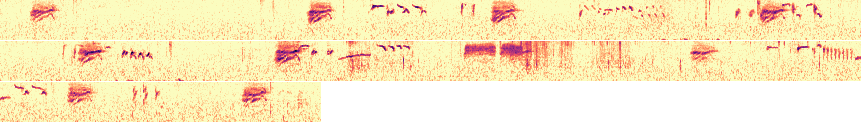

In [ ]:
query_rec = (user_recs
    .loc['20180805-60c3']  # BEWR
    .pipe(projection.slice_audio, 6.5)  # Re-denoise spectro
)
print(rec_str_line(query_rec))
display(rec_probs(query_rec, search, 15))
plot_spectro_micro(query_rec, features, wrap=True,
    # audio=True,
    # limit_s=60,
)

 43.9  20170819-8661  2017-08-19T16:27:21  _UNK  4.7s  UNK_20170819_092720


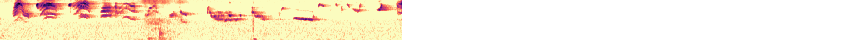

 45.0  20170514-94f6  2017-05-14T15:59:19  _UNK  127.8s  various (community garden by christopher playground)


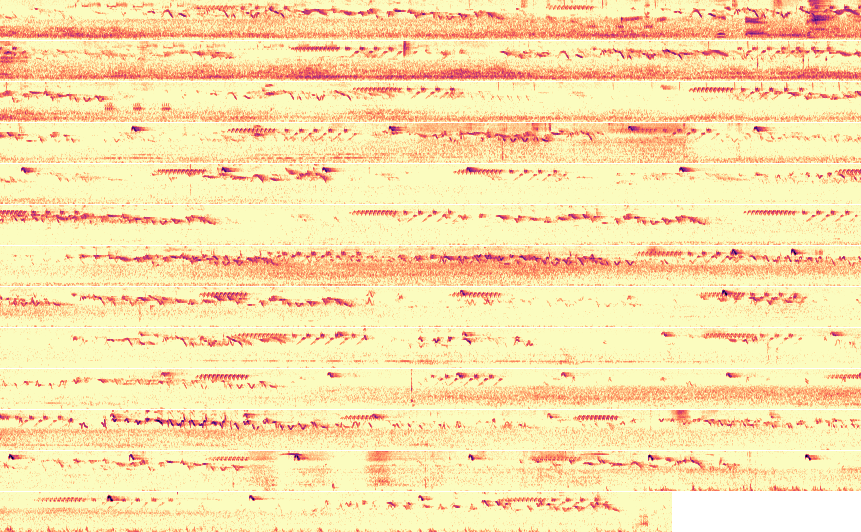

 45.7  20171007-602c  2017-10-07T15:20:39  BEWR  46.5s  BEWR Bewicks Wren (Coyote Hills parking lot)


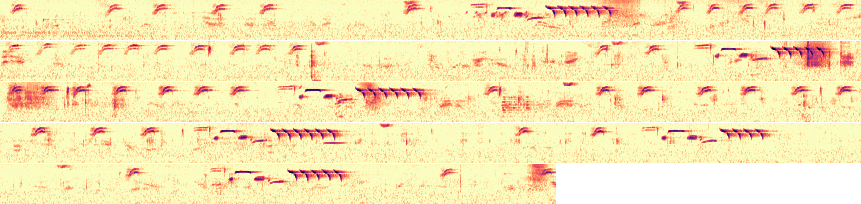

In [ ]:
for result in df_rows(
    rec_neighbors(projection, query_rec, user_recs)
    [:3]
):
    print(rec_str_line(result, ('dist', '%5.1f')))
    plot_spectro_micro(result, features,
        wrap=True,
        # audio=True,
    )

# Load xc recs

In [ ]:
# TODO Clean this up (how much complexity can we encapsulate and hide in functions vs. how much do we need to surface here?)

In [ ]:
# Load xc_meta (fast)
#   1. countries: Filter recs to these countries
#   2. species: Filter recs to these species
#   3. recs_at_least: Filter species to those with at least this many recs
#   4. num_species: Sample this many of the species
#   5. num_recs: Sample this many recs per species
inf = np.inf
# countries_k, com_names_k = 'na', 'us'      # 9.4k/400k -> 1.1k/60k -> 774/53k
# countries_k, com_names_k = 'na', 'ca'      # 9.4k/400k -> 1.1k/60k -> 334/35k
# countries_k, com_names_k = 'na', 'dan170'  # 9.4k/400k -> 1.1k/60k -> 170/3.4k
countries_k, com_names_k = 'na', 'dan4'    # 9.4k/400k -> 1.1k/60k ->   4/2.2k
recs_at_least, num_species, num_recs =   0, inf, inf  # US[334/35k ->1.1k/60k -> 774/53k -> 774/53k   -> 743/53k]    # All US
# recs_at_least, num_species, num_recs = 100, 100, 100  # CA[334/35k -> 127/25k -> 100/21k -> 100/10k   -> 100/10k]
# recs_at_least, num_species, num_recs =  50, 100, 100  # CA[334/35k -> 224/32k -> 100/16k -> 100/ 9.0k -> 100/ 9.0k]
# recs_at_least, num_species, num_recs =   0, 100, 100  # CA[334/35k -> 334/35k -> 100/12k -> 100/ 6.8k ->  99/ 6.8k]
# recs_at_least, num_species, num_recs =   0, 168, 100  # CA[334/34k -> 334/34k -> 168/18k -> 168/11k   -> 167/11k]    # (old 'all')
# recs_at_least, num_species, num_recs =   0, 168,  20  # CA[334/34k -> 334/35k -> 168/18k -> 168/ 3.2k -> 167/ 3.2k]  # (old 'recs')
# recs_at_least, num_species, num_recs =  20, 168,  20  # CA[334/35k -> 296/35k -> 168/20k -> 168/ 3.4k -> 168/ 3.4k]  # Familiar set
# recs_at_least, num_species, num_recs =  20, 336,  20  # US[774/53k -> 528/51k -> 336/33k -> 336/ 6.7k -> 336/ 6.7k]  # Scale species
# recs_at_least, num_species, num_recs =  10, 168,  20  # CA[334/35k ->                                             ]  # Class imbalance
# recs_at_least, num_species, num_recs =   0, 168,  20  # CA[334/35k ->                                             ]  # Class imbalance
# recs_at_least, num_species, num_recs =   0, inf,  20  # dan170 for app_brainstorm_1
# recs_at_least, num_species, num_recs =  20, 50,  100  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,   50  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,   20  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,   10  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,    5  # Faster dev
get_recs_stats = lambda df: dict(sp=df.species.nunique(), recs=len(df))
puts_stats = lambda desc: partial(tap, f=lambda df: print('%-15s %12s (sp/recs)' % (desc, '%(sp)s/%(recs)s' % get_recs_stats(df))))
xc_meta = (xc.metadata
    .pipe(puts_stats('all'))
    # 1. countries: Filter recs to these countries
    [lambda df: df.country.isin(constants.countries[countries_k])]
    .pipe(puts_stats('countries'))
    # 2. species: Filter recs to these species
    [lambda df: df.species.isin(com_names_to_species(*com_names[com_names_k]))]
    .pipe(puts_stats('species'))
    # Omit not-downloaded recs (should be few within the selected countries)
    [lambda df: df.downloaded]
    .pipe(puts_stats('(downloaded)'))
    # Remove empty cats for perf
    .pipe(df_remove_unused_categories)
    # 3. recs_at_least: Filter species to those with at least this many recs
    [lambda df: df.species.isin(df.species.value_counts()[lambda s: s >= recs_at_least].index)]
    .pipe(puts_stats('recs_at_least'))
    # 4. num_species: Sample this many of the species
    [lambda df: df.species.isin(df.species.drop_duplicates().pipe(lambda s: s.sample(n=min(len(s), num_species), random_state=0)))]
    .pipe(puts_stats('num_species'))
    # 5. num_recs: Sample this many recs per species
    #   - Remove empty cats else .groupby fails on empty groups
    .pipe(df_remove_unused_categories)
    .groupby('species').apply(lambda g: g.sample(n=min(len(g), num_recs), random_state=0))
    .pipe(puts_stats('num_recs'))
    # Drop species with <2 recs, else StratifiedShuffleSplit complains (e.g. 'TUVU')
    [lambda df: df.species.isin(df.species.value_counts()[lambda s: s >= 2].index)]
    .pipe(puts_stats('recs ≥ 2'))
    # Clean up for downstream
    .pipe(df_remove_unused_categories)
)
_recs_stats = get_recs_stats(xc_meta)
recs_stats = ', '.join(['%s[%s]' % (k, v) for k, v in _recs_stats.items()])
display(
    recs_stats,
    # df_summary(xc_meta).T,
    # df_value_counts(xc_meta),
    # xc_meta.sample(n=min(10, len(xc_meta)), random_state=0).sort_values('species'),
)

all              9442/399859 (sp/recs)
countries         1148/59713 (sp/recs)
species               4/2167 (sp/recs)
(downloaded)          4/2167 (sp/recs)
recs_at_least         4/2167 (sp/recs)
num_species           4/2167 (sp/recs)
num_recs              4/2167 (sp/recs)
recs ≥ 2              4/2167 (sp/recs)


'sp[4], recs[2167]'

In [ ]:
# Load xc_recs (slower)
xc_paths = [
    ('xc', f'{data_dir}/xc/data/{row.species}/{row.id}/audio.mp3')
    for row in df_rows(xc_meta)
]
joblib.dump(xc_paths, '/tmp/xc_paths')  # When uncached, helpful to run load.recs in a terminal (long running and verbose)
xc_recs = (
    load.recs(paths=xc_paths)
    .assign(xc_id=lambda df: df.id.str.split('/').str[3].astype(int))
    .merge(how='left', on='xc_id', right=(xc_meta
        .rename(columns={'id': 'xc_id'})
        .drop(columns=['species', 'sci_name', 'com_name'])
    ))
)
display(
    df_summary(xc_recs).T,
    df_value_counts(xc_recs, exprs=[
        'species',
        'subspecies',
        'country',
        ('quality', dict(sort_values=True)),
        'type',
        ('(duration_s//30)*30', dict(sort_values=True)),
        'locality',
        'recordist',
        ('date.dt.year', dict(sort_values=True, ascending=False)),
        ("time.str.slice(0, 2)"),
    ]),
    xc_recs.sample(n=min(10, len(xc_recs)), random_state=0).sort_values('species'),
)

min                                           25%                                                       50%                                                               75%                                                max
                 dtype          sizeof len  count nunique mean       std                                                                                                                                                                                                                                                                                 
index            int64          17336  2167 2167  2167     1.083e+03 6.257e+02                                             0                                           541                                                      1083                                                              1624                                               2166
dataset          object         127853 2167 2167  1       NaN        NaN                                                  xc                                            xc                                                        xc                                                                xc                                                 xc
species          category       2571   2167 2167  4       NaN        NaN                                                HOWR                                          BEWR                                                      SOSP                                                              SOSP                                               SPTO
species_com_name category       2604   2167 2167  4       NaN        NaN                                          House Wren                                 Bewick's Wren                                              Song Sparrow                                                      Song Sparrow                                     Spotted Towhee
species_query    object         132187 2167 2167  4       NaN        NaN                                                BEWR                                          HOWR                                                      SOSP                                                              SOSP                                               SPTO
duration_s       float64        17336  2167 2167  2006     5.257e+01 6.337e+01                                          1.01                                          18.4                                                      36.3                                                              64.7                                           1.07e+03
samples_mb       float64        17336  2167 2167  2006     2.214e+00 2.667e+00                                        0.0424                                         0.774                                                      1.52                                                              2.72                                               44.9
samples_n        int64          17336  2167 2167  2006     1.161e+06 1.398e+06                                         22226                                        405720                                                    799488                                                           1426176                                           23533524
basename         object         134354 2167 2167  1       NaN        NaN                                               audio                                         audio                                                     audio                                                             audio                                              audio
species_longhand category       2632   2167 2167  4       NaN        NaN                                   House Wren - HOWR                          Bewick's Wren - BEWR                                       Song Sparrow - SOSP                                               Song Sparrow - SOSP                     

species    n   subspecies     n        country         n   quality    n              type     n  (duration_s//30)*30    n                                                          locality    n           recordist    n  date.dt.year    n time.str.slice(0, 2)    n
0    SOSP  648               1455  United States  1.43e+03         A  816              song  1173                  0.0  905                         Swan Lake, Victoria, Vancouver Island, BC  103     Ian Cruickshank  309          2018   41                   08  336
1    BEWR  522     montanus    95         Canada       460         B  915              call   435                 30.0  651     Rocky Point Bird Observatory, Metchosin, Vancouver Island, BC   48  Richard E. Webster  216          2017  152                   07  278
2    SPTO  521    parkmanii    77         Mexico       279         C  310        call, song   115                 60.0  299  San Bernardino National Wildlife Refuge, Cochise County, Arizona   44   Richard E Webster  118          2016  216                   09  265
3    HOWR  476       fallax    60                                  D   43              Song    56                 90.0  129                                                   Portal, Arizona   31    Manuel Grosselet   87          2015  296                   10  240
4               eremophilus    46                                  E   12        male, song    51                120.0   78          Hunter Mountain, Death Valley National Park, Inyo County   30    Thomas G. Graves   80          2014  210                    ?  171
5                   melodia    36                           no score   71        alarm call    38                150.0   43                                               Lundbreck Falls, AB   23       Frank Lambert   62          2013  302                   06  165
6                 megalonyx    34                                             contact calls    15                180.0   14                                  Bill Williams River NWR, Arizona   20         Mike Nelson   60          2012  321                   11  124
7               falcinellus    33                                              female, song    12                210.0   15                       Pedder Bay, Metchosin, Vancouver Island, BC   19         Paul Marvin   59          2011  135                   12   87
8                  oregonus    29                                                      Call    12                240.0   10                                            Yard, Croton, New York   17       Peter Boesman   57          2010   58                   05   66
9                     aedon    28                                          alarm call, call    12                270.0    6                                    3 km south of Fishing Lake, SK   15        Eric DeFonso   44          2009   53                   17   49

dataset species species_com_name species_query  duration_s  samples_mb  samples_n basename       species_longhand                         id                           path   xc_id  downloaded   subspecies           recordist        country                                                                            locality     lat      lng                     type quality       date     time license_type license_detail                                       license                                url                              download
194       xc    HOWR       House Wren          HOWR       2.078       0.087      45819    audio      House Wren - HOWR  xc/data/HOWR/290439/audio  xc/data/HOWR/290439/audio.mp3  290439        True                    Cara A. Krieg  United States                                 Prairieville (near  Delton), Barry County, Michigan  42.489  -85.450             female, song       A 2012-05-06    10:00     by-nc-sa            4.0  //creativecommons.org/licenses/by-nc-sa/4.0/  https://www.xeno-canto.org/290439  //www.xeno-canto.org/290439/download
443       xc    HOWR       House Wren          HOWR      54.465       2.291    1200960    audio      House Wren - HOWR  xc/data/HOWR/179087/audio  xc/data/HOWR/179087/audio.mp3  179087        True                         Dan Lane  United States                                            W Lancaster, Lancaster Co., Pennsylvania  40.043  -76.345  call, female song, song       B 2014-05-02    08:30     by-nc-sa            4.0  //creativecommons.org/licenses/by-nc-sa/4.0/  https://www.xeno-canto.org/179087  //www.xeno-canto.org/179087/download
602       xc    BEWR    Bewick's Wren          BEWR      13.087       0.550     288576    audio   Bewick's Wren - BEWR   xc/data/BEWR/91348/audio   xc/data/BEWR/91348/audio.mp3   91348        True  eremophilus         Mike Nelson  United States                                  Tunnel Drive, Canon City, Fremont County, Colorado  38.433 -105.274                     song       C 2010-04-22  12:45pm     by-nc-nd            2.5  //creativecommons.org/licenses/by-nc-nd/2.5/   https://www.xeno-canto.org/91348   //www.xeno-canto.org/91348/download
829       xc    BEWR    Bewick's Wren          BEWR      91.638       3.854    2020608    audio   Bewick's Wren - BEWR  xc/data/BEWR/351078/audio  xc/data/BEWR/351078/audio.mp3  351078        True  eremophilus  Richard E. Webster  United States                                                Olancha Pass Trail, Inyo, California  36.210 -118.077                     song       A 1995-05-19        ?     by-nc-sa            4.0  //creativecommons.org/licenses/by-nc-sa/4.0/  https://www.xeno-canto.org/351078  //www.xeno-canto.org/351078/download
909       xc    BEWR    Bewick's Wren          BEWR      17.502       0.736     385920    audio   Bewick's Wren - BEWR  xc/data/BEWR/319939/audio  xc/data/BEWR/319939/audio.mp3  319939        True                   Tiffany Towery  United States                                                Bonita, San Diego County, California  32.681 -117.027                     song       B 2016-06-01    10:00     by-nc-sa            4.0  //creativecommons.org/licenses/by-nc-sa/4.0/  https://www.xeno-canto.org/319939  //www.xeno-canto.org/319939/download
820       xc    BEWR    Bewick's Wren          BEWR      42.264       1.777     931921    audio   Bewick's Wren - BEWR  xc/data/BEWR/404736/audio  xc/data/BEWR/404736/audio.mp3  404736        True                 Jacob R. Saucier  United States                       Texas: Kinney County; 26.1 km NE Brackettville, Miguel Canyon  29.476 -100.227               call, song       A 2015-05-07    07:30     by-nc-sa            4.0  //creativecommons.org/licenses/by-nc-sa/4.0/  https://www.xeno-canto.org/404736  //www.xeno-canto.org/404736/download
529       xc    BEWR    Bewick's Wren          BEWR      70.949       2.984    1564416    audio   Bewick's Wren - BEWR  xc/data/BEWR/351058/audio  xc/data/BEWR/351058/audio.mp3  35105

In [ ]:
# Cheap plot: species counts
(xc_recs
    .species_longhand.value_counts().sort_index()
    .reset_index().rename(columns={'index': 'species_longhand', 'species_longhand': 'num_recs'})
    .assign(num_recs=lambda df: df.num_recs.map(lambda n: '%s /%s' % ('•' * int(n / df.num_recs.max() * 60), df.num_recs.max())))
)

species_longhand                                                           num_recs
0      House Wren - HOWR                  •••••••••••••••••••••••••••••••••••••••••••• /648
1   Bewick's Wren - BEWR              •••••••••••••••••••••••••••••••••••••••••••••••• /648
2    Song Sparrow - SOSP  •••••••••••••••••••••••••••••••••••••••••••••••••••••••••••• /648
3  Spotted Towhee - SPTO              •••••••••••••••••••••••••••••••••••••••••••••••• /648

In [ ]:
# Featurize: .audio, .feat, .spectro (slowest)
#   - NOTE .spectro is heavy: 3.1gb for 2167 dan4 recs
xc_recs = (xc_recs
    # .audio
    .assign(audio=lambda df: load.audio(df, scheduler='threads'))
    # .feat
    .pipe(projection.transform)
    # .spectro
    .pipe(app_recs_add_spectro, features, cache=True)
)
assert {'audio', 'feat', 'spectro'} <= set(xc_recs.columns)

[21:03:11.014] DEBUG  Load.audio:in
  len(recs): 2167
  len(recs) per dataset: {xc: 2167}
[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[#                                                                                         ] | 1% Completed |  0.2s

[#######                                                                                   ] | 7% Completed |  0.4s

[#######                                                                                   ] | 8% Completed |  0.5s

[###########                                                                               ] | 12% Completed |  0.6s

[#############                                                                             ] | 14% Completed |  0.7s

[#################                                                                         ] | 19% Completed |  0.8s

[##################                                                                        ] | 20% Completed |  0.9s

[########################                                                                  ] | 27% Completed |  1.1s

[##########################                                                                ] | 29% Completed |  1.2s

[##############################                                                            ] | 34% Completed |  1.3s

[################################                                                          ] | 35% Completed |  1.5s

[##################################                                                        ] | 37% Completed |  1.6s

[######################################                                                    ] | 42% Completed |  1.7s

[#######################################                                                   ] | 44% Completed |  1.8s

[#########################################                                                 ] | 46% Completed |  2.0s

[############################################                                              ] | 49% Completed |  2.1s

[##############################################                                            ] | 51% Completed |  2.2s

[##############################################                                            ] | 52% Completed |  2.3s

[#################################################                                         ] | 55% Completed |  2.4s

[#####################################################                                     ] | 58% Completed |  2.5s

[#####################################################                                     ] | 58% Completed |  2.7s

[######################################################                                    ] | 60% Completed |  2.9s

[#######################################################                                   ] | 61% Completed |  3.1s

[##########################################################                                ] | 64% Completed |  3.2s

[############################################################                              ] | 67% Completed |  3.4s

[#############################################################                             ] | 68% Completed |  3.5s

[##############################################################                            ] | 69% Completed |  3.6s

[################################################################                          ] | 71% Completed |  3.8s

[#################################################################                         ] | 72% Completed |  4.0s

[##################################################################                        ] | 73% Completed |  4.1s

[####################################################################                      ] | 76% Completed |  4.3s

[#######################################################################                   ] | 79% Completed |  4.4s

[########################################################################                  ] | 80% Completed |  4.5s

[##########################################################################                ] | 82% Completed |  4.7s

[###########################################################################               ] | 83% Completed |  4.8s

[#############################################################################             ] | 85% Completed |  4.9s

[##############################################################################            ] | 87% Completed |  5.0s

[#################################################################################         ] | 90% Completed |  5.2s

[##################################################################################        ] | 92% Completed |  5.3s

[###################################################################################       ] | 93% Completed |  5.5s

[######################################################################################    ] | 96% Completed |  5.6s

[##########################################################################################] | 100% Completed |  5.7s

[21:03:16.952] DEBUG  Load.audio:out
  len(audio): 2167


[21:03:17.190] DEBUG  Features.spectros:in
  len(recs): 2167
  len(recs) per dataset: {xc: 2167}
  sum(duration_h): 31.6
  sum(samples_mb): 4800.0
  sum(samples_n): 2515898309
[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[                                                                                          ] | 0% Completed |  0.2s

[                                                                                          ] | 0% Completed |  0.3s

[                                                                                          ] | 0% Completed |  0.4s

[                                                                                          ] | 0% Completed |  0.5s

[                                                                                          ] | 0% Completed |  0.6s

[                                                                                          ] | 0% Completed |  0.7s

[                                                                                          ] | 0% Completed |  0.8s

[                                                                                          ] | 0% Completed |  1.0s

[                                                                                          ] | 0% Completed |  1.1s

[###########                                                                               ] | 12% Completed |  1.2s

[#############                                                                             ] | 15% Completed |  1.3s

[###############                                                                           ] | 17% Completed |  1.4s

[##################                                                                        ] | 20% Completed |  1.5s

[##################                                                                        ] | 20% Completed |  1.6s

[##################                                                                        ] | 20% Completed |  1.7s

[##################                                                                        ] | 20% Completed |  1.8s

[##################                                                                        ] | 20% Completed |  1.9s

[##################                                                                        ] | 20% Completed |  2.0s

[##################                                                                        ] | 20% Completed |  2.1s

[########################                                                                  ] | 27% Completed |  2.2s

[#############################                                                             ] | 32% Completed |  2.3s

[#############################                                                             ] | 32% Completed |  2.4s

[####################################                                                      ] | 40% Completed |  2.5s

[####################################                                                      ] | 40% Completed |  2.6s

[####################################                                                      ] | 40% Completed |  2.7s

[####################################                                                      ] | 40% Completed |  2.9s

[####################################                                                      ] | 40% Completed |  3.0s

[####################################                                                      ] | 40% Completed |  3.1s

[####################################                                                      ] | 40% Completed |  3.2s

[####################################                                                      ] | 40% Completed |  3.3s

[####################################                                                      ] | 40% Completed |  3.4s

[######################################                                                    ] | 42% Completed |  3.5s

[########################################                                                  ] | 45% Completed |  3.6s

[#############################################                                             ] | 50% Completed |  3.7s

[#############################################                                             ] | 50% Completed |  3.8s

[#################################################                                         ] | 55% Completed |  3.9s

[######################################################                                    ] | 60% Completed |  4.0s

[######################################################                                    ] | 60% Completed |  4.1s

[######################################################                                    ] | 60% Completed |  4.2s

[######################################################                                    ] | 60% Completed |  4.3s

[######################################################                                    ] | 60% Completed |  4.4s

[######################################################                                    ] | 60% Completed |  4.6s

[######################################################                                    ] | 60% Completed |  4.7s

[######################################################                                    ] | 60% Completed |  4.8s

[##########################################################                                ] | 65% Completed |  4.9s

[############################################################                              ] | 67% Completed |  5.0s

[#################################################################                         ] | 72% Completed |  5.1s

[###################################################################                       ] | 75% Completed |  5.2s

[########################################################################                  ] | 80% Completed |  5.3s

[########################################################################                  ] | 80% Completed |  5.4s

[########################################################################                  ] | 80% Completed |  5.5s

[########################################################################                  ] | 80% Completed |  5.6s

[########################################################################                  ] | 80% Completed |  5.7s

[##########################################################################                ] | 82% Completed |  5.8s

[##########################################################################                ] | 82% Completed |  5.9s

[##########################################################################                ] | 82% Completed |  6.0s

[############################################################################              ] | 85% Completed |  6.1s

[##############################################################################            ] | 87% Completed |  6.2s

[#####################################################################################     ] | 95% Completed |  6.3s

[##########################################################################################] | 100% Completed |  6.4s

[21:03:23.777] DEBUG  Features.spectros:out
  (f, sum(t)): [40, 9809417]


In [ ]:
df_value_counts(xc_recs, limit=15, exprs=[
    'species',
    'subspecies',
    'country',
    ('quality', dict(sort_values=True)),
    'type',
    ('(duration_s//30)*30', dict(sort_values=True)),
    # 'locality',
    # 'recordist',
    # ('date.dt.year', dict(sort_values=True, ascending=False)),
    # ("time.str.slice(0, 2)"),
])

species    n     subspecies     n        country         n   quality    n              type     n  (duration_s//30)*30    n
0     SOSP  648                 1455  United States  1.43e+03         A  816              song  1173                  0.0  905
1     BEWR  522       montanus    95         Canada       460         B  915              call   435                 30.0  651
2     SPTO  521      parkmanii    77         Mexico       279         C  310        call, song   115                 60.0  299
3     HOWR  476         fallax    60                                  D   43              Song    56                 90.0  129
4                  eremophilus    46                                  E   12        male, song    51                120.0   78
5                      melodia    36                           no score   71        alarm call    38                150.0   43
6                    megalonyx    34                                             contact calls    15                180.0   14
7                  falcinellus    33                                              female, song    12                210.0   15
8                     oregonus    29                                                      Call    12                240.0   10
9                        aedon    28                                          alarm call, call    12                270.0    6
10                    mexicana    26                                           fledgling calls    10                300.0    1
11                charienturus    21                                               flight call    10                330.0    2
12                     cahooni    18                                                 mew calls     9                360.0    5
13               brunneicollis    18                                                  juvenile     9                390.0    2
14                   heermanni    17                                          call, male, song     6                450.0    2

# Query against xc recs

20180805-60c3  2018-08-05T15:57:16  BEWR  23.7s  BEWR - vollmer peak+71d9bc30


0      1      2       3       4       5       6       7       8      9       10      11     12       13       14
species   PUFI   OATI   LISP    BARS    DOWO    BEWR    HUVI    BAWW    GCWA   LASP    PISI    RCSP   RCKI     AMRO     BTPI
p        0.321  0.158  0.099  0.0827  0.0569  0.0448  0.0341  0.0335  0.0259  0.024  0.0157  0.0144  0.011  0.00926  0.00652

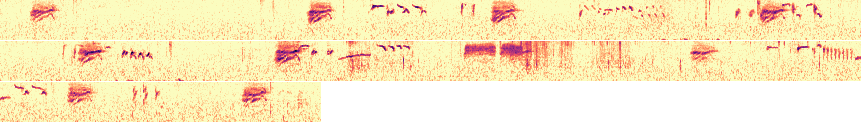

In [ ]:
query_rec = (user_recs
    .loc['20180805-60c3']  # BEWR
    .pipe(projection.slice_audio, 6.5)  # Re-denoise spectro
)
print(rec_str_line(query_rec))
display(rec_probs(query_rec, search, 15))
plot_spectro_micro(query_rec, features, wrap=True,
    audio=False,
    # limit_s=60,
)

 36.6  XC169517  BEWR  98.0s  B  call, song  United States/Arizona/Yavapai/Prescott National Forest (near  Prescott)  2014-03-10  Micah Riegner[by-nc-sa]


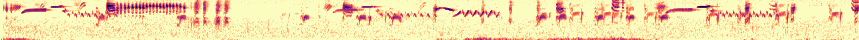

 36.8  XC217841  BEWR  80.0s  A  call  United States/California/San Diego County/near Dulzura/Otay Mountain  2013-03-28  Paul Marvin[by-nc-sa]


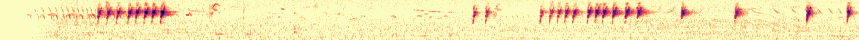

 37.0  XC282275  HOWR  230.7s  C  song  United States/New York/Nassau/Glen Cove  2015-05-03  Albert Lastukhin & Max Lastukhin[by-nc-sa]


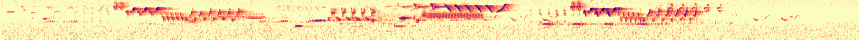

 37.3  XC89675  SOSP  51.7s  B  song  United States/Tennessee/Maryville/Kyker Bottoms Wildlife Refuge  2011-11-02  Mike Nelson[by-nc-nd]


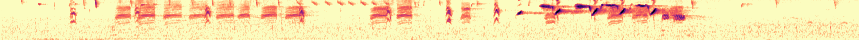

 37.6  XC158943  SPTO  84.4s  A  song  Canada/BC/Vancouver Island/Central Saanich/Island View Beach Regional Park  2012-07-07  Ian Cruickshank[by-nc-nd]


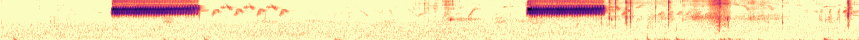

 37.7  XC231551  HOWR  25.9s  A  song  Mexico/Sinaloa/Barranca Rancho Liebre  2002-04-03  Peter Boesman[by-nc-nd]


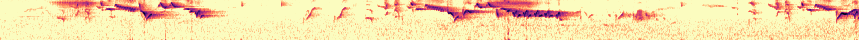

 37.7  XC334610  SOSP  95.6s  B  Sub-song, song  United States/California/Contra Costa County/Moraga  2016-09-11  Denise Wight[by-nc-sa]


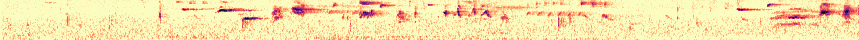

 38.2  XC142328  HOWR  26.7s  B  song  United States/Pennsylvania/Chester/Marsh Creek State Park  2013-07-07  Amy Davis[by-nc-sa]


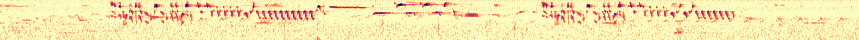

 38.6  XC159624  SOSP  92.3s  C  jumbled song  Canada/BC/Vancouver Island/Metchosin/Rocky Point Bird Observatory  2012-09-20  Ian Cruickshank[by-nc-nd]


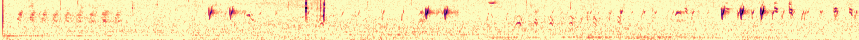

 39.0  XC358837  SOSP/maxillaris  31.3s  A  song  United States/California/Solano County/Grizzly Island Wildlife Area  2017-03-11  Jim Holmes[by-nc-sa]


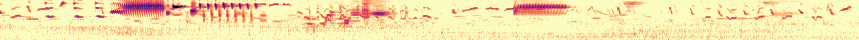

In [ ]:
for result in df_rows(
    rec_neighbors(projection, query_rec, xc_recs)
    [:10]
):
    print(xc_rec_str_line(result, ('dist', '%5.1f')))
    plot_spectro_micro(result, features,
        audio=False,
        wrap=False,
    )

# Q: Is dist(feat) actually useful? (part 1)
- Try SPTO as a simple starting point

[                                                                                          ] | 0% Completed |  0.0s

[##########################################################################################] | 100% Completed |  0.1s

20180429-dcf3  2018-04-29T16:35:13  SPTO  1.1s  SPTO spotted towhee song- kings rd+4b071150


0      1      2       3       4       5       6       7       8       9       10      11      12      13      14
species   TRES   PAWA   CARW    CHSP    SEWR    HUVI    WREN    SAPH    SCTA    SOSP    SWSP    BCTI    SPTO    WTSW    WETA
p        0.203  0.123  0.111  0.0643  0.0509  0.0445  0.0355  0.0277  0.0265  0.0218  0.0199  0.0179  0.0152  0.0145  0.0142

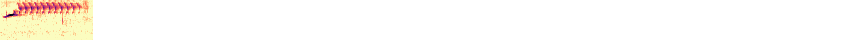

In [ ]:
# Slower SPTO trill
#   - Many more clean samples in this rec (all slow trills from same individual)
user_rec_spto_slow_clean = (user_recs
    .loc['20180429-dcf3']  # SPTO spotted towhee song- kings rd
    .pipe(projection.slice_spectro, 16.84, 17.92)
)
print(rec_str_line(user_rec_spto_slow_clean))
display(rec_probs(user_rec_spto_slow_clean, search, 15))
plot_spectro_micro(user_rec_spto_slow_clean, features,
    # audio=True,
)

[                                                                                          ] | 0% Completed |  0.0s

[##########################################################################################] | 100% Completed |  0.1s

20160716-6753  2016-07-16T16:47:33  SPTO  0.8s  SPTO spotted towhee+63e22f8f


0      1       2       3       4     5       6       7       8       9       10       11       12       13      14
species   DOWO   BEKI    CHSP    OATI    WREN  CERW    BBWA    MGWA    RCSP    ANHU    PAWR     RUHU     PIWO     BCCH    SNEG
p        0.466  0.201  0.0777  0.0326  0.0289  0.02  0.0177  0.0133  0.0122  0.0087  0.0074  0.00735  0.00697  0.00638  0.0056

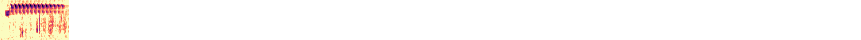

In [ ]:
# Faster SPTO trill
#   - Most samples are noisy in this rec, this is the cleanest one I found
user_rec_spto_fast_noisy = (user_recs
    .loc['20160716-6753']  # SPTO spotted towhee
    .pipe(projection.slice_spectro, 33.8, 34.6)
)
print(rec_str_line(user_rec_spto_fast_noisy))
display(rec_probs(user_rec_spto_fast_noisy, search, 15))
plot_spectro_micro(user_rec_spto_fast_noisy, features,
    # audio=True,
)

species    n    subspecies    n        country    n   quality    n             type    n  (duration_s//30)*30    n
0    SPTO  521                287  United States  350         A  234             song  289                  0.0  198
1                   montanus   95         Canada  113         B  198             call  127                 30.0  172
2                  megalonyx   34         Mexico   58         C   70       call, song   19                 60.0   81
3                falcinellus   33                             D    8             Song   14                 90.0   34
4                   oregonus   29                             E    2       male, song   12                120.0   17
5                umbraticola    8                      no score    9        mew calls    9                150.0    8
6                    oaxacae    7                                          call, male    5                180.0    4
7                   arcticus    5                                      high mew calls    3                210.0    1
8               magnirostris    5                                     high seep calls    3                240.0    2
9                   macronyx    4                                          Alarm call    2                360.0    2

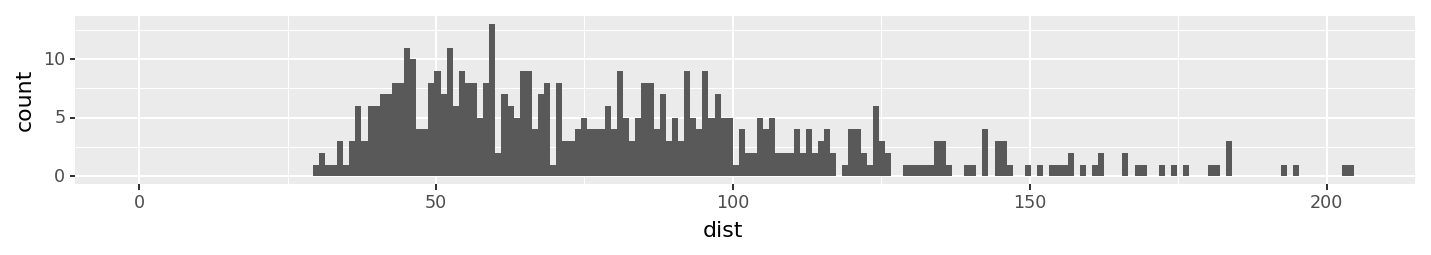

 36.8  XC325379  SPTO/falcinellus  2.9s  A  song  United States/California/Sacramento County/Mather Lake  2016-07-03  Jim Holmes[by-nc-sa]


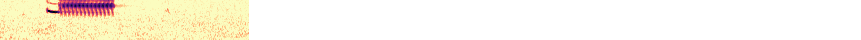

 37.2  XC100251  SPTO  18.5s  A  Song  United States/Point Loma Nazarene University  2012-04-22  Trent R. Stanley[by-nc-nd]


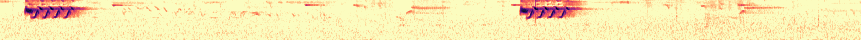

 39.0  XC325228  SPTO  21.7s  A  song  Canada/British Columbia/Saanichton  2016-04-07  James Bradley[by-nc-sa]


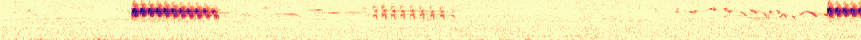

 39.5  XC179496  SPTO  32.7s  A  alarm call, call  United States/Arizona/Maricopa County/Mount Ord  2014-05-23  Tim Marquardt[by-nc-sa]


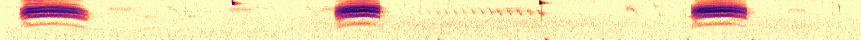

 40.7  XC159140  SPTO  16.2s  A  contact calls  Canada/BC/Vancouver Island/Victoria /Swan Lake  2012-08-05  Ian Cruickshank[by-nc-nd]


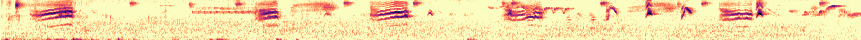

 41.3  XC37389  SPTO  26.1s  A  song  Canada/BC/Vancouver/north shore/UBC campus  2009-07-27  Bob Planqué[by-nc-sa]


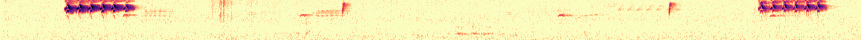

 41.5  XC228177  SPTO  13.5s  A  song  Mexico/Distrito F/La Cima  2003-04-18  Peter Boesman[by-nc-nd]


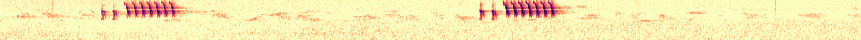

 42.4  XC159721  SPTO  8.1s  A  call  Canada/BC/Vancouver Island/Metchosin/Rocky Point Bird Observatory  2012-10-05  Ian Cruickshank[by-nc-nd]


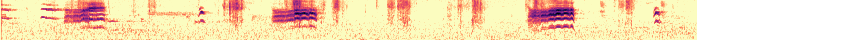

 42.6  XC126634  SPTO/megalonyx  20.4s  A  song  United States/San Bernardino Mountains/Santa Ana River Valley  1998-06-16  Richard E. Webster[by-nc-sa]


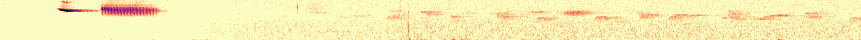

 43.1  XC408816  SPTO/clementae?  36.0s  A  song  United States/California/San Bernardino County/Rimforest  2015-05-09  Frank Lambert[by-nc-nd]


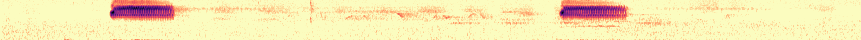

 43.4  XC159417  SPTO  66.2s  A  call  Canada/BC/Vancouver Island/Metchosin/Rocky Point Bird Observatory  2012-09-01  Ian Cruickshank[by-nc-nd]


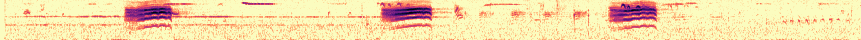

 44.7  XC32580  SPTO  32.7s  A  song  Mexico/Mexico City/Contadero  2009-04-14  manuel Grosselet[by-nc-nd]


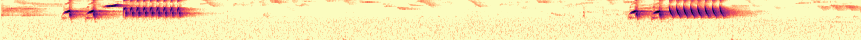

 44.9  XC181454  SPTO  33.5s  A  song  United States/Arizona/Maricopa County/Slate Creek Divide/Pigeon Spring  2014-06-07  Tim Marquardt[by-nc-sa]


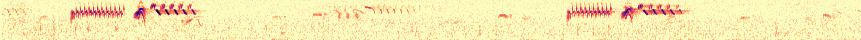

 45.9  XC228178  SPTO  11.9s  A  call  Mexico/Nuevo Leon/Cola de Caballo area  2000-05-30  Peter Boesman[by-nc-nd]


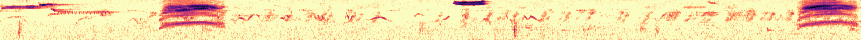

 46.0  XC73502  SPTO/oregonus  32.3s  A  Song  Canada/British Columbia/Victoria/Mount Douglas Park  2011-03-03  Ian Cruickshank[by-nc-nd]


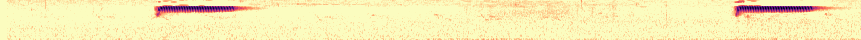

 46.0  XC159823  SPTO  20.0s  A  call  Canada/BC/Vancouver Island/Duncan/Quamichan Lake  2013-01-01  Ian Cruickshank[by-nc-nd]


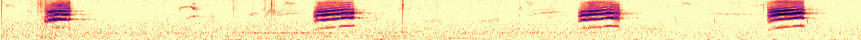

 46.1  XC158976  SPTO  45.5s  A  song  Canada/BC/Vancouver Island/Victoria/Swan Lake  2012-07-11  Ian Cruickshank[by-nc-nd]


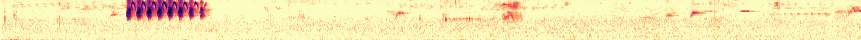

 46.8  XC128909  SPTO  39.6s  A  song  United States/Cerro Alto Campground/California/Atascadero  2013-04-06  Thomas G. Graves[by-nc-sa]


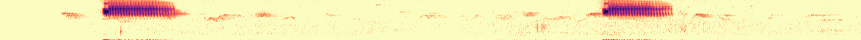

 47.5  XC158934  SPTO  53.5s  A  song  Canada/BC/Vancouver Island/Central Saanich/Island View Beach Regional Park  2012-07-07  Ian Cruickshank[by-nc-nd]


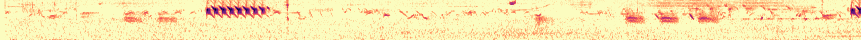

 48.4  XC158913  SPTO  109.9s  A  song and thin seep calls   Canada/BC/Vancouver Island/Victoria/Swan Lake  2012-07-04  Ian Cruickshank[by-nc-nd]


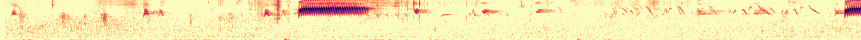

In [ ]:
query_rec = user_rec_spto_slow_clean
# query_rec = user_rec_spto_fast_noisy
results = rec_neighbors(projection, query_rec, (xc_recs
    .query("species == 'SPTO'")
    # .query("quality.isin(['A'])")
))
display(
    df_value_counts(results, exprs=[
        'species',
        'subspecies',
        'country',
        ('quality', dict(sort_values=True)),
        'type',
        ('(duration_s//30)*30', dict(sort_values=True)),
        # 'locality',
        # 'recordist',
        # ('date.dt.year', dict(sort_values=True, ascending=False)),
        # ("time.str.slice(0, 2)"),
    ]),
)
repr(results
    .pipe(ggplot) + aes(x='dist') + geom_histogram(bins=200)
    + expand_limits(x=0)
)
for result in df_rows(results
    .query("quality.isin(['A'])")
    # [:0]
    [:20]
):
    print(xc_rec_str_line(result, ('dist', '%5.1f')))
    plot_spectro_micro(result, features,
        # audio=True,
    )

# Take a quick stab at thumbnailing

234
XC126631  SPTO/montanus  14.1s  A  song  United States/California/Inyo/Death Valley N.P./Panamint Mtns./Telescope Peak  2000-05-20  Richard E. Webster[by-nc-sa]


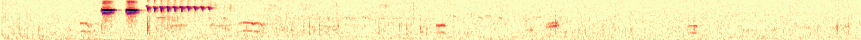

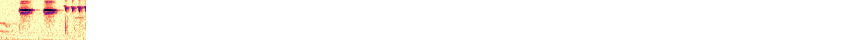

XC159417  SPTO  66.2s  A  call  Canada/BC/Vancouver Island/Metchosin/Rocky Point Bird Observatory  2012-09-01  Ian Cruickshank[by-nc-nd]


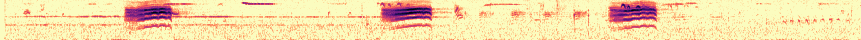

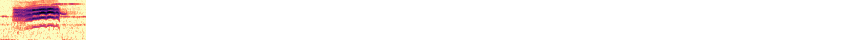

XC127001  SPTO/montanus  33.2s  A  song  United States/California/Inyo/Death Valley N.P./Panamint Mtns./Telescope Peak  1995-05-20  Richard E. Webster[by-nc-sa]


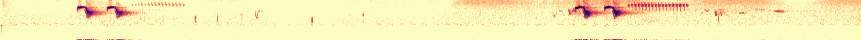

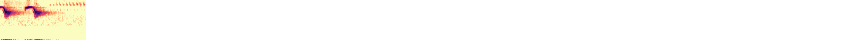

XC408095  SPTO  79.8s  A  song  United States/California/Orange County/Irvine/San Joquin Wildlife Sanctuary  2015-05-17  Frank Lambert[by-nc-nd]


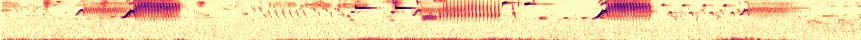

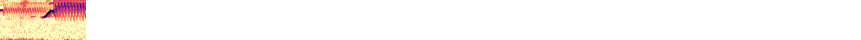

XC261399  SPTO  87.6s  A  song  Mexico/Veracruz/Aquila  2015-07-18  Manuel Grosselet[by-nc-sa]


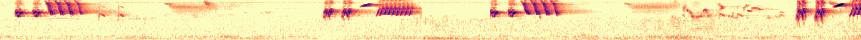

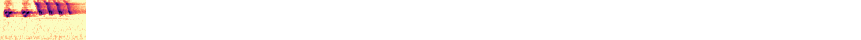

XC126761  SPTO/montanus  95.1s  A  song  United States/Inyo County/Death Valley National Park/Hunter Mountain  1997-03-19  Richard E. Webster[by-nc-sa]


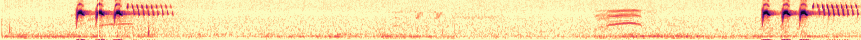

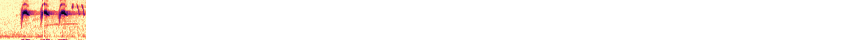

XC159823  SPTO  20.0s  A  call  Canada/BC/Vancouver Island/Duncan/Quamichan Lake  2013-01-01  Ian Cruickshank[by-nc-nd]


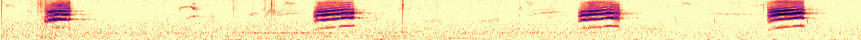

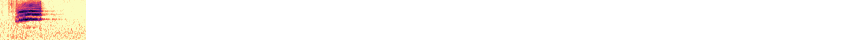

XC127014  SPTO/megalonyx  113.5s  A  call, song  United States/San Diego County/SDNWR/Sweetwater River  2001-05-13  Richard E. Webster[by-nc-sa]


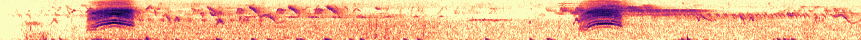

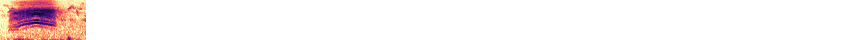

XC126673  SPTO/megalonyx  56.9s  A  song  United States/San Diego County/San Diego River/Old Mission Dam  1995-07-08  Richard E. Webster[by-nc-sa]


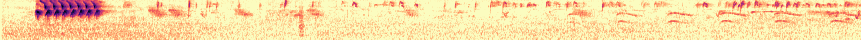

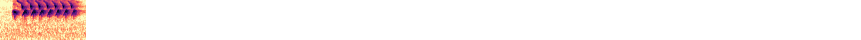

XC408475  SPTO/megalonyx  23.3s  A  song  United States/California/Los Angeles County/San Gabriel Mountains/Big Santa Anita Canyon  2015-05-23  Frank Lambert[by-nc-nd]


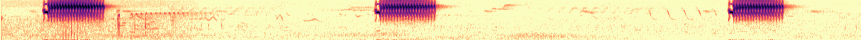

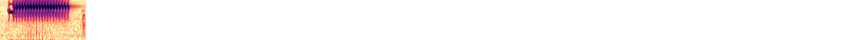

XC228178  SPTO  11.9s  A  call  Mexico/Nuevo Leon/Cola de Caballo area  2000-05-30  Peter Boesman[by-nc-nd]


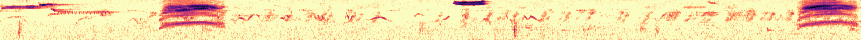

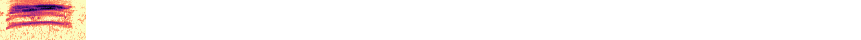

XC158934  SPTO  53.5s  A  song  Canada/BC/Vancouver Island/Central Saanich/Island View Beach Regional Park  2012-07-07  Ian Cruickshank[by-nc-nd]


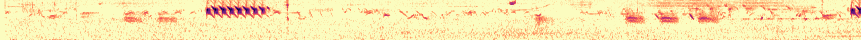

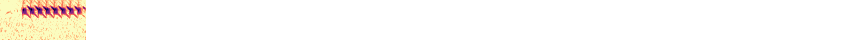

XC159434  SPTO  86.4s  A  mew calls  Canada/BC/Vancouver Island/Victoria/Swan Lake  2012-09-02  Ian Cruickshank[by-nc-nd]


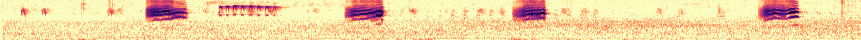

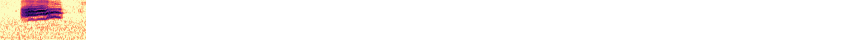

XC183584  SPTO/oregonus  62.4s  A  song  Canada/British Columbia/Capital/Saanich (near  Victoria)  2014-06-24  Ian Cruickshank[by-nc-sa]


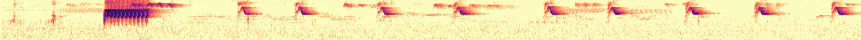

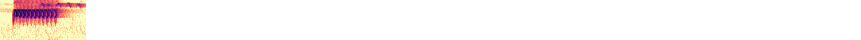

XC340723  SPTO  38.9s  A  Double Whistle  United States/Washington/King County/Magnuson Park Kingfisher Basin  2015-05-30  Bruce Lagerquist[by-nc-sa]


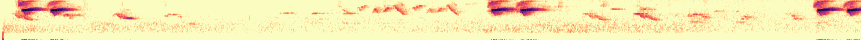

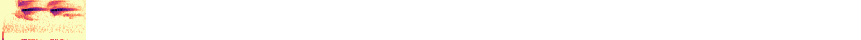

XC126478  SPTO/montanus  59.4s  A  song  United States/Inyo County/Death Valley National Park/Hunter Mountain  2000-05-21  Richard E. Webster[by-nc-sa]


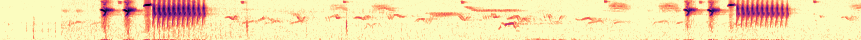

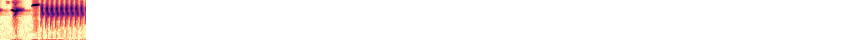

XC163627  SPTO/oregonus  43.4s  A  song  Canada/BC/Vancouver Island/Victoria/Swan Lake  2011-02-20  Ian Cruickshank[by-nc-sa]


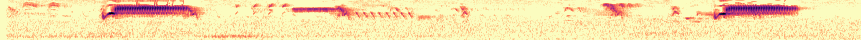

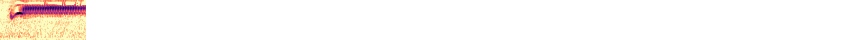

XC361832  SPTO/montanus  27.6s  A  call  United States/CO/Gunnison Co/Black Canyon of the Gunnison River  2015-04-21  Frank Lambert[by-nc-nd]


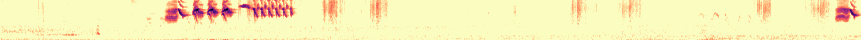

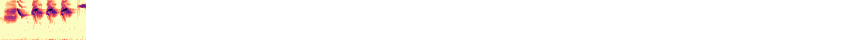

XC375917  SPTO  98.9s  A  call  United States/Nevada/Churchill County/Desatoya Range/Bassie Canyon  2017-06-10  Bobby Wilcox[by-nc-sa]


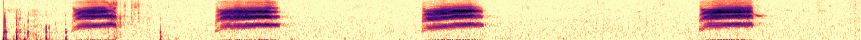

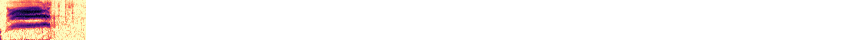

XC126654  SPTO/falcinellus  22.8s  A  song  United States/Inyo County/Haiwee Creek  2000-06-15  Richard E. Webster[by-nc-sa]


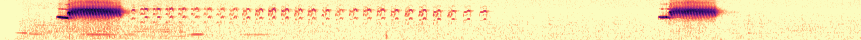

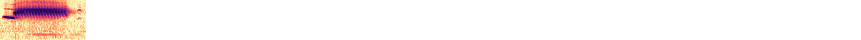

In [ ]:
for rec in df_rows(xc_recs
    .query("species == 'SPTO'")
    .query("quality == 'A'")
    .pipe(tap, lambda df: print(len(df)))
    # [:20]
):
    print(xc_rec_str_line(rec))
    plot_spectro_micro(rec, features,
        # audio=True,
    )
    plot_thumbnail_micro(rec, features,
        # audio=True,
    )
    plt.show()